In [63]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\Andyj\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Andyj\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Andyj\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 8.4/8.4 MB 17.3 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 KB 19.2 MB/s eta 0:00:00
     --------------------------------------- 42.5/42.5 MB 19.8 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Andyj\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import io, time, json
import requests
from bs4 import BeautifulSoup

In [96]:
df = pd.read_csv('Los-Angeles-Crime-2001-Present.csv')
# make a new column for year so we can drop 
# the date column while reducing data size
df['Year'] = pd.to_datetime(df['DATE OCC']).dt.year
# keep only columns of interest
df = df[['Year', 'Crm Cd Desc', 'Premis Desc']].set_index('Year')
print(df.head())
df.to_csv('crime_los_angeles_reduced.csv')

                                            Crm Cd Desc  \
Year                                                      
2020                           BATTERY - SIMPLE ASSAULT   
2020                           BATTERY - SIMPLE ASSAULT   
2020          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE   
2020           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
2020  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   

                                       Premis Desc  
Year                                                
2020                        SINGLE FAMILY DWELLING  
2020                                      SIDEWALK  
2020                               POLICE FACILITY  
2020  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  
2020                           BEAUTY SUPPLY STORE  


In [95]:
df = pd.read_csv('Chicago-Crime-2001-Present.csv')
# keep only columns of interest
df = df[['Year', 'Primary Type', 'Location Description']].set_index('Year')
print(df.head())
df.to_csv('crime_chicago_reduced.csv')

     Primary Type Location Description
Year                                  
2015      BATTERY            RESIDENCE
2015        THEFT              CTA BUS
2018        THEFT            RESIDENCE
2015    NARCOTICS             SIDEWALK
2015      ASSAULT            APARTMENT


In [106]:
# check the data
chicago_crime_df = pd.read_csv('crime_chicago_reduced.csv')
print(chicago_crime_df.head())
los_crime_df = pd.read_csv('crime_los_angeles_reduced.csv')
print(los_crime_df.head())

   Year Primary Type Location Description
0  2015      BATTERY            RESIDENCE
1  2015        THEFT              CTA BUS
2  2018        THEFT            RESIDENCE
3  2015    NARCOTICS             SIDEWALK
4  2015      ASSAULT            APARTMENT
   Year                                        Crm Cd Desc  \
0  2020                           BATTERY - SIMPLE ASSAULT   
1  2020                           BATTERY - SIMPLE ASSAULT   
2  2020          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE   
3  2020           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
4  2020  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   

                                    Premis Desc  
0                        SINGLE FAMILY DWELLING  
1                                      SIDEWALK  
2                               POLICE FACILITY  
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)  
4                           BEAUTY SUPPLY STORE  


In [107]:
# we see that the column names 'Crm Cd Desc' and 'Premis Desc'
# is confusing so we rename them to their equivalent
los_crime_df = los_crime_df.rename(columns={
    'Crm Cd Desc': 'Primary Type',
    'Premis Desc': 'Location Description'
})
los_crime_df

,Year,Primary Type,Location Description
0,2020,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING
1,2020,BATTERY - SIMPLE ASSAULT,SIDEWALK
2,2020,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,POLICE FACILITY
3,2020,VANDALISM - MISDEAMEANOR ($399 OR UNDER),"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
4,2020,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",BEAUTY SUPPLY STORE
...,...,...,...
682330,2023,THEFT OF IDENTITY,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)"
682331,2023,THEFT PLAIN - PETTY ($950 & UNDER),STREET
682332,2023,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",HEALTH SPA/GYM
682333,2023,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","VEHICLE, PASSENGER/TRUCK"


In [108]:
def describe(df):
    '''
    Give some preliminary observation on the given dataframe:
    - Size and data type
    - NaN count each column
    - Value count each column
    '''
    print('**************************')
    print('*** Size and data type')
    size = len(df)
    print(f'Size: {df.size}')
    print(df.dtypes)
    print('**************************')
    print('*** NaN count each column')
    nan_df = df.isna().sum().to_frame(name='count')
    nan_df['percent'] = nan_df['count'] / size * 100
    print(nan_df)
    for col in df:
        print('**************************')
        print(f'*** Value count of {col}')
        val_df = df[col].value_counts().to_frame(name='count')
        val_df['percent'] = val_df['count'] / size * 100
        print(val_df)

In [109]:
describe(chicago_crime_df)

**************************
*** Size and data type
Size: 23247021
Year                     int64
Primary Type            object
Location Description    object
dtype: object
**************************
*** NaN count each column
                      count  percent
Year                      0  0.00000
Primary Type              0  0.00000
Location Description  10152  0.13101
**************************
*** Value count of Year
       count   percent
2002  486801  6.282108
2001  485872  6.270120
2003  475979  6.142452
2004  469420  6.057808
2005  453769  5.855834
2006  448174  5.783631
2007  437081  5.640478
2008  427159  5.512435
2009  392816  5.069243
2010  370492  4.781155
2011  351959  4.541988
2012  336260  4.339395
2013  307462  3.967760
2014  275727  3.558224
2016  269778  3.481453
2017  269049  3.472045
2018  268750  3.468186
2015  264737  3.416399
2019  261213  3.370922
2022  237221  3.061308
2020  212042  2.736376
2021  208445  2.689958
2023   38801  0.500722
************************

In [110]:
# column Location Description has very few row with NaN value
# we can drop that
chicago_crime_df = chicago_crime_df[~chicago_crime_df['Location Description'].isna()]
describe(chicago_crime_df)

**************************
*** Size and data type
Size: 23216565
Year                     int64
Primary Type            object
Location Description    object
dtype: object
**************************
*** NaN count each column
                      count  percent
Year                      0      0.0
Primary Type              0      0.0
Location Description      0      0.0
**************************
*** Value count of Year
       count   percent
2002  486796  6.290285
2001  485867  6.278280
2003  475975  6.150458
2004  469405  6.065561
2005  453751  5.863283
2006  448156  5.790986
2007  437058  5.647580
2008  427118  5.519137
2009  392764  5.075221
2010  370420  4.786496
2011  351656  4.544031
2012  335803  4.339182
2013  307247  3.970187
2014  275340  3.557891
2016  268493  3.469415
2017  267763  3.459982
2018  267682  3.458935
2015  264150  3.413296
2019  259963  3.359192
2022  236476  3.055698
2020  210743  2.723181
2021  207577  2.682270
2023   38652  0.499454
************************

In [111]:
describe(los_crime_df)

**************************
*** Size and data type
Size: 2047005
Year                     int64
Primary Type            object
Location Description    object
dtype: object
**************************
*** NaN count each column
                      count  percent
Year                      0  0.00000
Primary Type              0  0.00000
Location Description    357  0.05232
**************************
*** Value count of Year
       count    percent
2022  232194  34.029326
2021  208854  30.608719
2020  199022  29.167784
2023   42265   6.194171
**************************
*** Value count of Primary Type
                                                    count    percent
VEHICLE - STOLEN                                    73485  10.769637
BATTERY - SIMPLE ASSAULT                            53731   7.874578
THEFT OF IDENTITY                                   44602   6.536672
BURGLARY FROM VEHICLE                               42870   6.282838
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...  4

In [112]:
# column Location Description also has very few row with NaN value
# we can drop that
los_crime_df = los_crime_df[~los_crime_df['Location Description'].isna()]
describe(los_crime_df)

**************************
*** Size and data type
Size: 2045934
Year                     int64
Primary Type            object
Location Description    object
dtype: object
**************************
*** NaN count each column
                      count  percent
Year                      0      0.0
Primary Type              0      0.0
Location Description      0      0.0
**************************
*** Value count of Year
       count    percent
2022  232048  34.025731
2021  208762  30.611251
2020  198954  29.173082
2023   42214   6.189936
**************************
*** Value count of Primary Type
                                                    count    percent
VEHICLE - STOLEN                                    73483  10.774981
BATTERY - SIMPLE ASSAULT                            53721   7.877234
THEFT OF IDENTITY                                   44601   6.539947
BURGLARY FROM VEHICLE                               42870   6.286127
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...  4

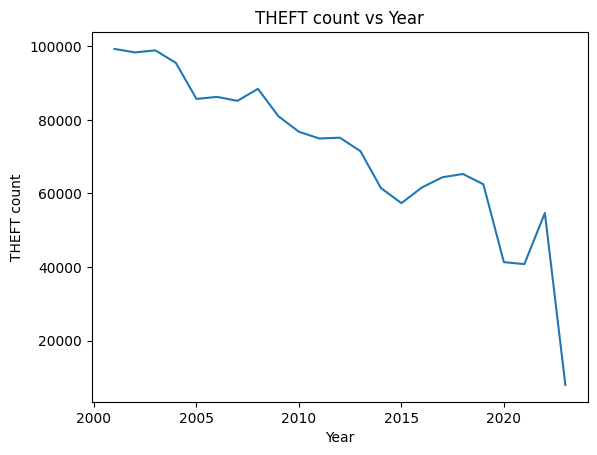

In [113]:
def plot_by_year(year_type_df, value_name):
    by_year = year_type_df[year_type_df['Primary Type'] == value_name].groupby(['Year']).count()
    plt.plot(by_year)
    plt.title(f'{value_name} count vs Year')
    plt.xlabel('Year')
    plt.ylabel(f'{value_name} count')
    plt.show()

year_type_df = chicago_crime_df[['Year', 'Primary Type']]

# show how much theft happens over time
plot_by_year(year_type_df, 'THEFT')

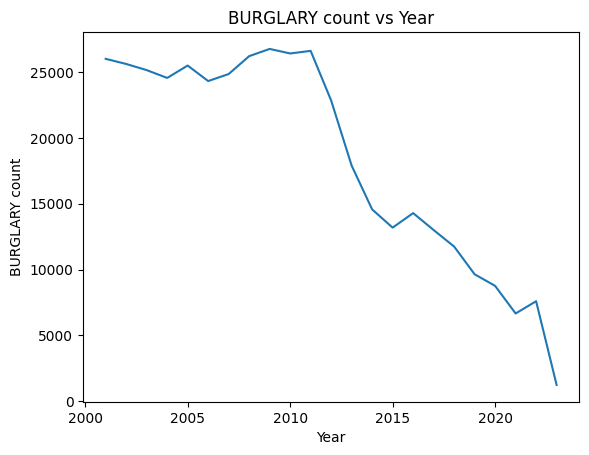

In [114]:
# show how much burglary happens over time
plot_by_year(year_type_df, 'BURGLARY')

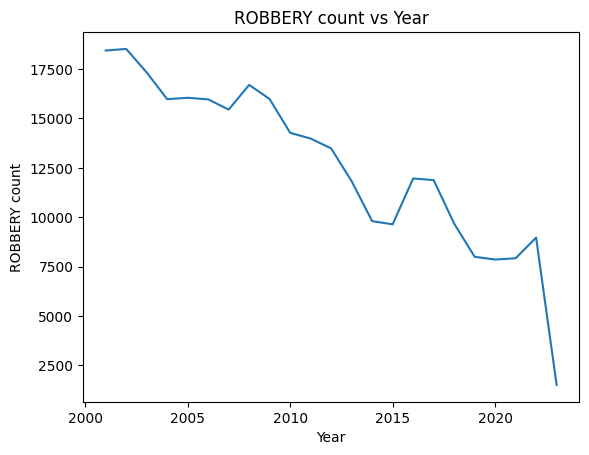

In [115]:
# show how much robbery that happens over time
plot_by_year(year_type_df, 'ROBBERY')

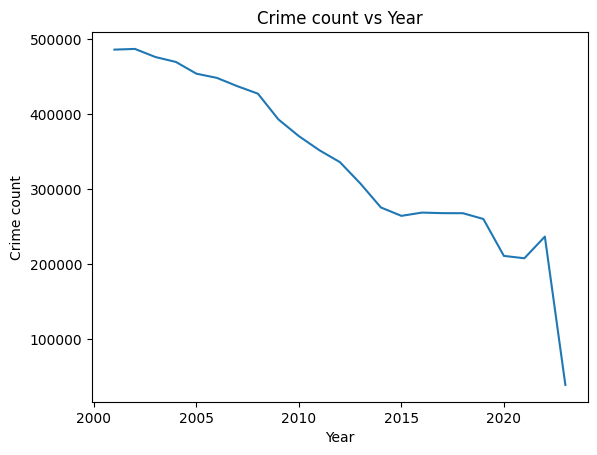

In [116]:
count_by_year = year_type_df.groupby(['Year']).count()
plt.plot(count_by_year)
plt.title(f'Crime count vs Year')
plt.xlabel('Year')
plt.ylabel(f'Crime count')
plt.show()

In [117]:
year_type_df = chicago_crime_df[['Year', 'Primary Type']]
# get a dataframe of counts of various crimes each year
by_year = year_type_df.groupby(['Year']).value_counts().to_frame('Count')
# convert count to percentage of that year
count_by_year = year_type_df.groupby(['Year']).count()
by_year = by_year.join(count_by_year, how='inner')
by_year.columns = ['Count', 'Total']
by_year['Percent'] = by_year['Count'] / by_year['Total']
by_year

Count   Total   Percent
Year Primary Type                                     
2001 THEFT                     99276  485867  0.204328
     BATTERY                   93459  485867  0.192355
     CRIMINAL DAMAGE           55857  485867  0.114964
     NARCOTICS                 50567  485867  0.104076
     ASSAULT                   31384  485867  0.064594
...                              ...     ...       ...
2023 KIDNAPPING                   20   38652  0.000517
     OBSCENITY                     5   38652  0.000129
     OTHER NARCOTIC VIOLATION      2   38652  0.000052
     GAMBLING                      1   38652  0.000026
     PUBLIC INDECENCY              1   38652  0.000026

[718 rows x 3 columns]

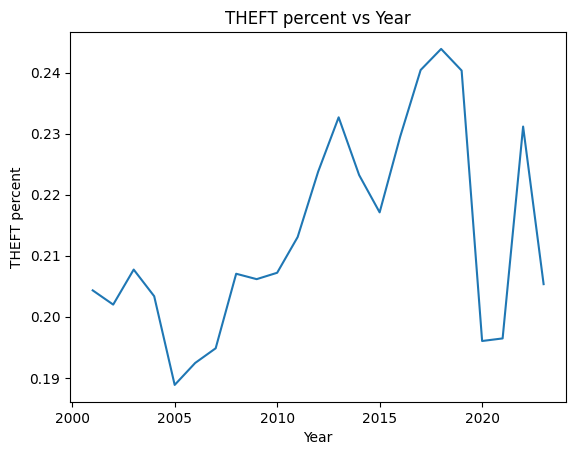

In [118]:
# plot these percentages instead of counts
def plot_rate_by_year(year_type_df, value_name):
    rate_df = year_type_df[year_type_df['Primary Type'] == value_name][['Percent']]
    plt.plot(rate_df)
    plt.title(f'{value_name} percent vs Year')
    plt.xlabel('Year')
    plt.ylabel(f'{value_name} percent')
    plt.show()
    
# make a full dataframe for plotting
rate_by_year = by_year.reset_index()[['Year', 'Primary Type', 'Percent']].set_index(keys='Year')
# show how much theft happens over time
plot_rate_by_year(rate_by_year, 'THEFT')

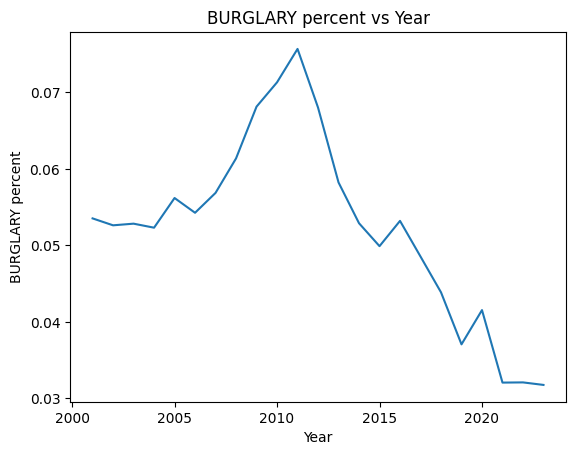

In [119]:
# show how much burglary happens over time
plot_rate_by_year(rate_by_year, 'BURGLARY')

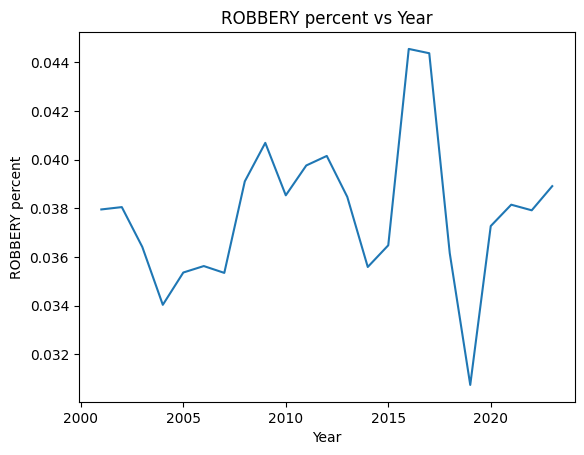

In [120]:
# show how much robbery happens over time
plot_rate_by_year(rate_by_year, 'ROBBERY')

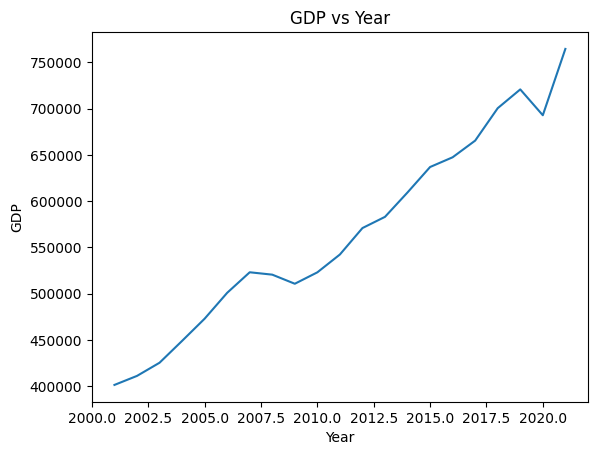

In [121]:
# make a df for GDP
chicago_gdp = pd.read_csv('chicago-gdp-2001-2021.csv')
chicago_gdp.columns = ['Year', 'GDP']
chicago_gdp.Year = pd.DatetimeIndex(chicago_gdp.Year).year
chicago_gdp = chicago_gdp.set_index('Year')
# plot it
plt.plot(chicago_gdp)
plt.title('GDP vs Year')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [122]:
# merge the crime and gdp dfs together
chicago_crime_gdp = chicago_gdp.join(rate_by_year, how='inner')
chicago_crime_gdp

,GDP,Primary Type,Percent
Year,,,
2001,401407.693,THEFT,0.204328
2001,401407.693,BATTERY,0.192355
2001,401407.693,CRIMINAL DAMAGE,0.114964
2001,401407.693,NARCOTICS,0.104076
2001,401407.693,ASSAULT,0.064594
...,...,...,...
2021,764583.227,GAMBLING,0.000063
2021,764583.227,HUMAN TRAFFICKING,0.000053
2021,764583.227,NON-CRIMINAL,0.000019


In [89]:
# use Pearson correlation to showcase crime-GDP correlation of different crimes
corr_df = chicago_crime_gdp.groupby('Primary Type')[['GDP','Percent']].corr(method='pearson')
corr_df = corr_df.unstack().iloc[:,1].to_frame(name='Pearson Corr').sort_values(by='Pearson Corr')
corr_df

,Pearson Corr
Primary Type,
LIQUOR LAW VIOLATION,-0.929253
PROSTITUTION,-0.905202
NARCOTICS,-0.838574
GAMBLING,-0.811801
KIDNAPPING,-0.774002
CRIMINAL TRESPASS,-0.721560
BURGLARY,-0.554588
MOTOR VEHICLE THEFT,-0.523189
CRIMINAL DAMAGE,-0.330021


In [90]:
abs_corr = corr_df.abs().sort_values(by='Pearson Corr')
abs_corr.columns = ['Pearson Correlation Magnitude']
abs_corr

,Pearson Correlation Magnitude
Primary Type,
ROBBERY,0.069750
PUBLIC PEACE VIOLATION,0.085193
ARSON,0.130220
OTHER OFFENSE,0.139863
RITUALISM,0.186185
INTIMIDATION,0.215434
CRIM SEXUAL ASSAULT,0.225556
BATTERY,0.228747
OTHER NARCOTIC VIOLATION,0.267886


In [91]:
# use Kendall correlation to showcase crime-GDP correlation of different crimes
corr_df = chicago_crime_gdp.groupby('Primary Type')[['GDP','Percent']].corr(method='kendall')
corr_df = corr_df.unstack().iloc[:,1].to_frame(name='Kendall Corr').sort_values(by='Kendall Corr')
corr_df

,Kendall Corr
Primary Type,
LIQUOR LAW VIOLATION,-0.800000
PROSTITUTION,-0.771429
KIDNAPPING,-0.742857
GAMBLING,-0.523810
CRIMINAL TRESPASS,-0.514286
NARCOTICS,-0.504762
MOTOR VEHICLE THEFT,-0.380952
BURGLARY,-0.342857
CRIMINAL DAMAGE,-0.238095


In [92]:
abs_corr = corr_df.abs().sort_values(by='Kendall Corr')
abs_corr.columns = ['Kendall Correlation Magnitude']
abs_corr

,Kendall Correlation Magnitude
Primary Type,
RITUALISM,0.000000
OTHER OFFENSE,0.057143
ROBBERY,0.066667
BATTERY,0.095238
PUBLIC PEACE VIOLATION,0.104762
ARSON,0.142857
SEX OFFENSE,0.152381
OTHER NARCOTIC VIOLATION,0.161905
INTIMIDATION,0.180952


In [84]:
from sklearn.linear_model import LinearRegression

crime_types = chicago_crime_gdp['Primary Type'].unique()
lin_reg_coefs = []
for crime_type in crime_types:
    crime_type_df = chicago_crime_gdp[chicago_crime_gdp['Primary Type'] == crime_type]
    # set up dataset
    X = crime_type_df[['GDP']]
    y = crime_type_df[['Percent']]
    model = LinearRegression().fit(X, y)
    # print out the coefficients
    lin_reg_coefs.append(model.coef_[0][0])
# make the dataframe
coef_df = pd.DataFrame(
    {'Primary Type': crime_types, 'Linear Regression Coef': lin_reg_coefs}
).sort_values(by='Linear Regression Coef').set_index(keys='Primary Type')
coef_df

,Linear Regression Coef
Primary Type,
NARCOTICS,-2.590680e-07
BURGLARY,-5.605672e-08
PROSTITUTION,-4.306026e-08
MOTOR VEHICLE THEFT,-3.099257e-08
CRIMINAL TRESPASS,-3.080016e-08
CRIMINAL DAMAGE,-2.476663e-08
GAMBLING,-7.252703e-09
LIQUOR LAW VIOLATION,-6.918733e-09
KIDNAPPING,-2.683223e-09


In [85]:
# perform the same process as correlation
abs_coef = coef_df.abs().sort_values(by='Linear Regression Coef')
abs_coef.columns = ['Coefficient Magnitude']
abs_coef

,Coefficient Magnitude
Primary Type,
DOMESTIC VIOLENCE,0.000000e+00
RITUALISM,1.148456e-11
OTHER NARCOTIC VIOLATION,2.435842e-11
NON-CRIMINAL (SUBJECT SPECIFIED),4.109592e-11
PUBLIC INDECENCY,9.238076e-11
INTIMIDATION,2.053305e-10
NON-CRIMINAL,2.324222e-10
HUMAN TRAFFICKING,2.384187e-10
NON - CRIMINAL,4.609806e-10
